In [2]:
%cd ..
%pwd

/data_diet


'/data_diet'

In [3]:
%ls exps/

baseline/                       keep_max_grad_norm_scores_20/
keep_max_error_l2_norm_scores/  keep_max_input_variance_scores/
keep_max_grad_norm/             keep_max_noised_input_variance_scores/
keep_max_grad_norm_scores/


In [4]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

In [5]:
# load all recorder.pkl in exps/keep_max_*/size_*/run_8 and parse the * ask type and size and run
recorders = glob.glob('exps/keep_max_*/size_*/run_*/recorder.pkl')
recorders += glob.glob('exps/baseline/size_*/run_*/recorder.pkl')
recorders

['exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_35000/run_0/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_20000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_20000/run_0/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_45000/run_1/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_45000/run_0/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_6/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_1/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_2/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_7/recorder.pkl',
 'exps/keep_max_input_varian

In [7]:
# regex for parsing the * ask type and size and run

regex = re.compile(r'exps/(?P<type>.+)/size_(?P<size>\d+)/run_(?P<run>\d+)/recorder.pkl')

# parse the * ask type and size and run
parsed = {recorder: dict(score=(p := regex.match(recorder).groupdict())['type'],size=int(p['size']),run=int(p['run'])) for recorder in recorders}
parsed

{'exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 45000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 45000,
  'run': 0},
 'exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 25000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 25000,
  'run': 0},
 'exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 35000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_35000/run_0/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 35000,
  'run': 0},
 'exps/keep_max_error_l2_norm_scores/size_20000/run_1/recorder.pkl': {'score': 'keep_max_error_l2_norm_scores',
  'size': 20000,
  'run': 1},
 'exps

In [8]:
# load tqdm
from tqdm.auto import tqdm

In [9]:
# load the recorders using np
recorders = {recorder: np.load(recorder, allow_pickle=True) for recorder in tqdm(recorders)}

  0%|          | 0/66 [00:00<?, ?it/s]

In [10]:
# Get the last 'test_acc' and 'test_loss' for each recorder and the max 'test_acc' and min 'test_loss' for each recorder and create a dataframe with these fields and merge in the entries from the parsed dict
df = pd.DataFrame({recorder: {**parsed[recorder], **{'max_test_acc': max(recorders[recorder]['test_acc']), 'min_test_loss': min(recorders[recorder]['test_loss']), 'last_test_acc': recorders[recorder]['test_acc'][-1], 'last_test_loss': recorders[recorder]['test_loss'][-1]}} for recorder in tqdm(recorders)})
df = df.T
df['pruned_fraction'] = 1-df['size']/50000
df

  0%|          | 0/66 [00:00<?, ?it/s]

,score,size,run,max_test_acc,min_test_loss,last_test_acc,last_test_loss,pruned_fraction
exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl,keep_max_error_l2_norm_scores,45000,1,0.9528,0.175053,0.9519,0.175453,0.1
exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl,keep_max_error_l2_norm_scores,45000,0,0.9507,0.194602,0.9499,0.197604,0.1
exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl,keep_max_error_l2_norm_scores,25000,1,0.9545,0.167687,0.9545,0.170939,0.5
exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl,keep_max_error_l2_norm_scores,25000,0,0.9508,0.17412,0.9499,0.177815,0.5
exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl,keep_max_error_l2_norm_scores,35000,1,0.9536,0.178126,0.9521,0.179939,0.3
...,...,...,...,...,...,...,...,...
exps/baseline/size_35000/run_3/recorder.pkl,baseline,35000,3,0.9425,0.225368,0.9418,0.226442,0.3
exps/baseline/size_20000/run_1/recorder.pkl,baseline,20000,1,0.9255,0.279959,0.9247,0.280758,0.6
exps/baseline/size_20000/run_2/recorder.pkl,baseline,20000,2,0.9276,0.274764,0.9246,0.281824,0.6
exps/baseline/size_20000/run_0/recorder.pkl,baseline,20000,0,0.9255,0.27432,0.9252,0.277882,0.6


In [11]:
# save dataframe to numpy records and then save as file
#np.save('figure1_reproduction.npy', df.to_records())

In [12]:
df = pd.DataFrame.from_records(np.load('figure1_reproduction.npy', allow_pickle=True), index='index')

In [13]:
df.columns, df.score.unique()

(Index(['score', 'size', 'run', 'max_test_acc', 'min_test_loss',
        'last_test_acc', 'last_test_loss', 'pruned_fraction'],
       dtype='object'),
 array(['keep_max_error_l2_norm_scores', 'keep_max_input_variance_scores',
        'keep_max_grad_norm_scores_20', 'keep_max_grad_norm_scores',
        'keep_max_noised_input_variance_scores', 'baseline'], dtype=object))

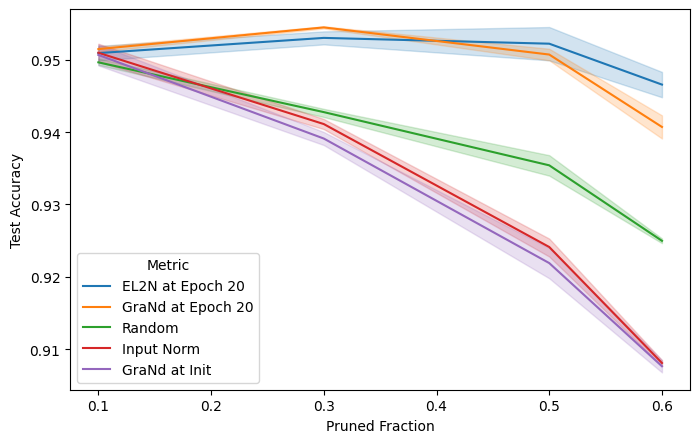

In [16]:
# Plot the 'last_test_acc' and 'last_test_loss' grouped by 'keep_max'
# Replace column names


# Rename
# ['score', 'size', 'run', 'max_test_acc', 'min_test_loss', 'last_test_acc', 'last_test_loss', 'pruned_fraction']
# to:
# [Metric', 'Training Size', 'run', 'Max Test Accuracy', 'min_test_loss', "Test Accuracy", "last_test_loss", "Pruned Fraction"]
        
new_df = df.rename(columns={'score': 'Metric', 'last_test_acc': "Test Accuracy", 'pruned_fraction': "Pruned Fraction"})


# Remap Metric column
new_df['Metric'] = new_df.Metric.map({'keep_max_error_l2_norm_scores': 'EL2N at Epoch 20', 'keep_max_input_variance_scores': 'Input Norm',
                          'keep_max_grad_norm_scores_20': "GraNd at Epoch 20", "keep_max_grad_norm_scores": 'GraNd at Init',
                                     'baseline': 'Random'})

plt.figure(figsize=(8,8/1.618))
sns.lineplot(data=new_df, x='Pruned Fraction', y='Test Accuracy', hue='Metric',
           hue_order=['EL2N at Epoch 20', 'GraNd at Epoch 20', 'Random', 'Input Norm', 'GraNd at Init'])
#sns.relplot(data=df, x='Pruned Fraction', y='max_test_acc', hue='score', kind='line')
#plt.savefig('pruned_accuracy.png', dpi=300, bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.savefig('pruned_accuracy.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()